# Predict Credit Consumption of Customer For Leading Bank
_Assignment from Analytix Labs_   

__Miserable performance__
linear regression -0.01357040616366787
ElasticNet -0.0010477442072762467
RF -0.06599766237314393
ETR -0.05036341042549628
GBM -0.01705186360584281
MLP -0.06970868357094107

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import joblib
import warnings
warnings.filterwarnings("ignore")

In [2]:
cust_df = pd.read_csv("FE/df_segm_pca_Kmeans.csv", index_col=False)
## need to remove index_col=False if it was saved without index
cust_df.shape

(14463, 117)

In [3]:
cust_df.drop(columns = ['index'], inplace=True)
display(cust_df.columns.to_list())

['NetBanking_Flag',
 'FE_isSaving',
 'FE_isFemale',
 'Emp_Tenure_Years',
 'Tenure_with_Bank',
 'Avg_days_between_transaction',
 'FE_age_noOutlierErrors',
 'card_lim',
 'trading',
 'CDs',
 'LifeInsurance',
 'emi_active',
 'sum_cc_cons',
 'sum_dc_cons',
 'sum_cc_count',
 'sum_dc_count',
 'sum_debit_amount',
 'sum_credit_amount',
 'sum_debit_count',
 'sum_credit_count',
 'MAX_credit_amount',
 'Neg_GeneralInsurance',
 'Pos_GeneralInsurance',
 'Income_LOW',
 'Income_MEDIUM',
 'FE_region_id_243.0-244.0',
 'FE_region_id_245.0-247.0',
 'FE_region_id_248.0-249.0',
 'FE_region_id_254.0-258.0',
 'FE_region_id_259.0-268.0',
 'FE_region_id_269.0-269.0',
 'FE_region_id_270.0-296.0',
 'FE_region_id_299.0-300.0',
 'FE_region_id_305.0-315.0',
 'FE_region_id_316.0-330.0',
 'FE_region_id_331.0-354.0',
 'FE_region_id_355.0-355.0',
 'FE_region_id_363.0-370.0',
 'FE_region_id_371.0-374.0',
 'FE_region_id_385.0-385.0',
 'FE_region_id_386.0-394.0',
 'FE_region_id_395.0-426.0',
 'FE_region_id_428.0-445.0',
 'F

In [4]:
from sklearn.preprocessing import StandardScaler
ss = StandardScaler().set_output(transform='pandas')
df_Spend_raw = pd.read_csv("FE/df_Spend_raw.csv")
df_Spend_raw.head()

,ID,cc_cons,cc_cons_quantileTransformed,card_lim,trading,CDs,LifeInsurance,emi_active,sum_cc_cons,sum_dc_cons,...,Income,Emp_Tenure_Years,Tenure_with_Bank,region_code,NetBanking_Flag,Avg_days_between_transaction,FE_isSaving,FE_isFemale,FE_age_noOutlierErrors,FE_region_id
0,12554,20014.0,0.747450,430000,593.20,1244.14,787.0,1674.09,51472.40,41474.00,...,MEDIUM,15.0,1.0,708.0,0.0,17.0,0.0,0.0,35.0,700.0-710.0
1,17645,10173.0,0.377158,127500,213557.15,172678.56,90525.0,13043.34,43830.62,2138.00,...,HIGH,15.0,6.0,123.0,0.0,14.0,0.0,0.0,35.0,123.0-233.0
2,7604,16095.0,0.602173,199999,165907.57,470000.00,25524.0,25375.27,31599.62,11825.11,...,MEDIUM,24.5,1.0,802.0,1.0,3.0,0.0,0.0,55.0,802.0-805.0
3,1590,7707.0,0.284819,155000,81872.65,223379.40,48500.0,3544.33,60620.38,24024.44,...,MEDIUM,4.5,6.0,867.0,1.0,4.0,0.0,1.0,29.0,867.0-867.0
4,16556,96408.0,0.814454,297000,568.80,385000.00,183999.0,12780.44,13926.40,15674.22,...,MEDIUM,12.6,4.0,802.0,1.0,7.0,0.0,0.0,34.0,802.0-805.0


In [5]:
other_numeric_cols = ['Emp_Tenure_Years','Tenure_with_Bank', 'Avg_days_between_transaction', 'FE_age_noOutlierErrors']
cols_sums = ['card_lim','trading','CDs','LifeInsurance','emi_active','sum_cc_cons','sum_dc_cons',
                    'sum_cc_count','sum_dc_count','sum_debit_amount','sum_credit_amount','sum_debit_count',
                    'sum_credit_count','MAX_credit_amount','Neg_GeneralInsurance','Pos_GeneralInsurance']
numeric_cols_toScale = other_numeric_cols+cols_sums
df_Spend_raw_nums = ss.fit_transform(df_Spend_raw[numeric_cols_toScale])
df_Spend_raw.drop(columns=numeric_cols_toScale, inplace=True)

pd.concat([df_Spend_raw, df_Spend_raw], axis=1)

,ID,cc_cons,cc_cons_quantileTransformed,Income,region_code,NetBanking_Flag,FE_isSaving,FE_isFemale,FE_region_id,ID,cc_cons,cc_cons_quantileTransformed,Income,region_code,NetBanking_Flag,FE_isSaving,FE_isFemale,FE_region_id
0,12554,20014.0,0.747450,MEDIUM,708.0,0.0,0.0,0.0,700.0-710.0,12554,20014.0,0.747450,MEDIUM,708.0,0.0,0.0,0.0,700.0-710.0
1,17645,10173.0,0.377158,HIGH,123.0,0.0,0.0,0.0,123.0-233.0,17645,10173.0,0.377158,HIGH,123.0,0.0,0.0,0.0,123.0-233.0
2,7604,16095.0,0.602173,MEDIUM,802.0,1.0,0.0,0.0,802.0-805.0,7604,16095.0,0.602173,MEDIUM,802.0,1.0,0.0,0.0,802.0-805.0
3,1590,7707.0,0.284819,MEDIUM,867.0,1.0,0.0,1.0,867.0-867.0,1590,7707.0,0.284819,MEDIUM,867.0,1.0,0.0,1.0,867.0-867.0
4,16556,96408.0,0.814454,MEDIUM,802.0,1.0,0.0,0.0,802.0-805.0,16556,96408.0,0.814454,MEDIUM,802.0,1.0,0.0,0.0,802.0-805.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14458,5480,1721.0,0.065804,MEDIUM,445.0,1.0,0.0,0.0,428.0-445.0,5480,1721.0,0.065804,MEDIUM,445.0,1.0,0.0,0.0,428.0-445.0
14459,6995,4263.0,0.158011,LOW,653.0,1.0,0.0,1.0,653.0-653.0,6995,4263.0,0.158011,LOW,653.0,1.0,0.0,1.0,653.0-653.0
14460,10376,11019.0,0.410194,MEDIUM,535.0,1.0,0.0,0.0,525.0-535.0,10376,11019.0,0.410194,MEDIUM,535.0,1.0,0.0,0.0,525.0-535.0
14461,2181,404227.0,0.996733,MEDIUM,464.0,1.0,0.0,0.0,464.0-465.0,2181,404227.0,0.996733,MEDIUM,464.0,1.0,0.0,0.0,464.0-465.0


In [6]:
cust_df_all = pd.merge(cust_df, df_Spend_raw, how='left', on=['ID','NetBanking_Flag','FE_isSaving',
                                                             'FE_isFemale'])
cust_df_all.head()

,NetBanking_Flag,FE_isSaving,FE_isFemale,Emp_Tenure_Years,Tenure_with_Bank,Avg_days_between_transaction,FE_age_noOutlierErrors,card_lim,trading,CDs,...,PC18,PC19,Segment_PCA_Kmeans,legend,ID,cc_cons,cc_cons_quantileTransformed,Income,region_code,FE_region_id
0,0.0,0.0,0.0,0.254905,-1.573730,1.081620,-0.628819,0.710996,-1.426811,-1.945863,...,0.797534,-0.474077,2,younger_dcUsers,12554,20014.0,0.747450,MEDIUM,708.0,700.0-710.0
1,0.0,0.0,0.0,0.254905,0.171199,0.535676,-0.628819,-0.391484,0.701574,0.394162,...,-1.004929,0.342321,2,younger_dcUsers,17645,10173.0,0.377158,HIGH,123.0,123.0-233.0
2,1.0,0.0,0.0,1.203283,-1.573730,-1.466117,1.011165,0.016794,0.610256,0.869216,...,0.534573,-0.456524,1,older_dcUsers,7604,16095.0,0.602173,MEDIUM,802.0,802.0-805.0
3,1.0,0.0,1.0,-0.793302,0.171199,-1.284136,-1.120814,-0.214361,0.354804,0.516300,...,0.743695,-0.393565,3,younger_freqUsers,1590,7707.0,0.284819,MEDIUM,867.0,867.0-867.0
4,1.0,0.0,0.0,0.015315,-0.526773,-0.738192,-0.710818,0.375397,-1.441977,0.774571,...,-0.681582,-0.410606,2,younger_dcUsers,16556,96408.0,0.814454,MEDIUM,802.0,802.0-805.0


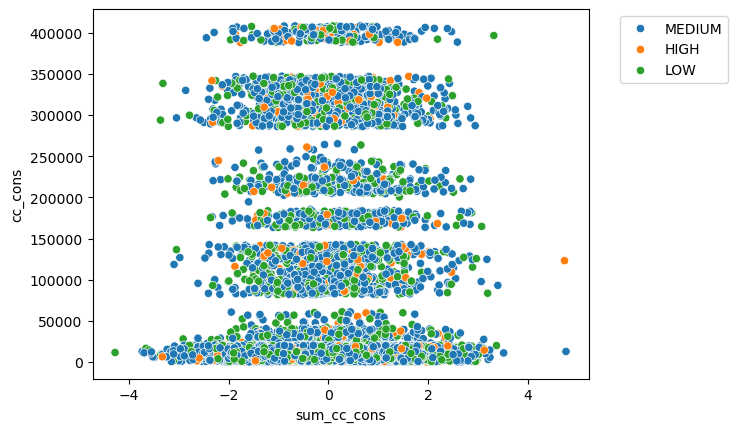

In [7]:
sns.scatterplot(data=cust_df_all, x='sum_cc_cons',y='cc_cons', hue='Income')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
cust_df_all.drop(columns=['Income','cc_cons_quantileTransformed','region_code','FE_region_id'], inplace=True)

In [8]:
cust_df = cust_df_all
from sklearn.preprocessing import OneHotEncoder
ohe = OneHotEncoder(handle_unknown = 'ignore', sparse_output=False, drop='first').set_output(transform='pandas')
legend_ohe = ohe.fit_transform(cust_df[['legend']])
cust_df = pd.concat([cust_df, legend_ohe],axis=1)
cust_df.drop(columns=['legend'], inplace=True)
cust_df.head()

,NetBanking_Flag,FE_isSaving,FE_isFemale,Emp_Tenure_Years,Tenure_with_Bank,Avg_days_between_transaction,FE_age_noOutlierErrors,card_lim,trading,CDs,...,PC17,PC18,PC19,Segment_PCA_Kmeans,ID,cc_cons,legend_older_lowUsers,legend_younger_dcUsers,legend_younger_freqUsers,legend_younger_infreqUsers
0,0.0,0.0,0.0,0.254905,-1.573730,1.081620,-0.628819,0.710996,-1.426811,-1.945863,...,-2.340601,0.797534,-0.474077,2,12554,20014.0,0.0,1.0,0.0,0.0
1,0.0,0.0,0.0,0.254905,0.171199,0.535676,-0.628819,-0.391484,0.701574,0.394162,...,0.366477,-1.004929,0.342321,2,17645,10173.0,0.0,1.0,0.0,0.0
2,1.0,0.0,0.0,1.203283,-1.573730,-1.466117,1.011165,0.016794,0.610256,0.869216,...,-0.120156,0.534573,-0.456524,1,7604,16095.0,0.0,0.0,0.0,0.0
3,1.0,0.0,1.0,-0.793302,0.171199,-1.284136,-1.120814,-0.214361,0.354804,0.516300,...,1.472607,0.743695,-0.393565,3,1590,7707.0,0.0,0.0,1.0,0.0
4,1.0,0.0,0.0,0.015315,-0.526773,-0.738192,-0.710818,0.375397,-1.441977,0.774571,...,-0.553823,-0.681582,-0.410606,2,16556,96408.0,0.0,1.0,0.0,0.0


In [9]:
from sklearn.model_selection import train_test_split
X=cust_df.drop(columns=['cc_cons'])
y=cust_df['cc_cons']

X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=22222)
## do I need to define random_state here?

In [10]:
columns_with_nan = cust_df.columns[cust_df.isna().any()].tolist()
columns_with_nan

[]

In [11]:
from sklearn.linear_model import LinearRegression, ElasticNet
from sklearn.ensemble import RandomForestRegressor,ExtraTreesRegressor, GradientBoostingRegressor
from sklearn.neural_network import MLPRegressor
from sklearn.model_selection import KFold, cross_val_score
from sklearn.preprocessing import LabelEncoder

In [12]:
model = LinearRegression()
scores = cross_val_score(model, X_train, y_train, cv=5)

print("Cross-validation scores:", scores)
print("Mean score:", scores.mean())

Cross-validation scores: [-0.14608743 -0.0253447  -0.16990099 -0.01809747  0.00071734]
Mean score: -0.07174265101847473


In [13]:
# names of models
models=[ ('lr',LinearRegression()),('ElasticNet',ElasticNet()),('RF',RandomForestRegressor()),
         ('ETR',ExtraTreesRegressor()),('GBM',GradientBoostingRegressor()),('MLP',MLPRegressor())

]

In [23]:
def model_selection_function(x,y,cross_folds,model, segment, y_treatment="none"):
  scores=[]
  names=[]
  for i, j in model:
    ## print(f"i = {i} and j={j}")
    cv_scores=cross_val_score(j,x,y,cv=cross_folds,n_jobs=-1)
    scores.append(cv_scores)
    names.append(i)
  for k in range(len(scores)):
    print(f'model {names[k]}, score {scores[k].mean()}, segment={segment}, y_treatment = {y_treatment}')
  return

In [15]:
model_selection_function(X_train,y_train,5,models)

i = lr and j=LinearRegression()
i = ElasticNet and j=ElasticNet()
i = RF and j=RandomForestRegressor()
i = ETR and j=ExtraTreesRegressor()
i = GBM and j=GradientBoostingRegressor()
i = MLP and j=MLPRegressor()


/Users/jasvinder/micromamba/envs/python_base/lib/python3.12/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/jasvinder/micromamba/envs/python_base/lib/python3.12/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/jasvinder/micromamba/envs/python_base/lib/python3.12/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/jasvinder/micromamba/envs/python_base/lib/python3.12/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the 

lr -0.07180340184859084
ElasticNet -0.001047744200200751
RF -0.06862478953730142
ETR -0.04949923186184853
GBM -0.016634310773820892
MLP -0.06896919398672367


/Users/jasvinder/micromamba/envs/python_base/lib/python3.12/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


In [16]:
model_selection_function(X_train,np.log(y_train+1),5,models)

i = lr and j=LinearRegression()
i = ElasticNet and j=ElasticNet()
i = RF and j=RandomForestRegressor()
i = ETR and j=ExtraTreesRegressor()
i = GBM and j=GradientBoostingRegressor()
i = MLP and j=MLPRegressor()
lr -0.10542002469486711
ElasticNet -0.00076033854678772
RF -0.024988460323489958
ETR -0.03351404701490868
GBM -0.007836592954618382
MLP -0.6925709347062351


In [ ]:
model_selection_function(X_train,np.sqrt(y_train+1),5,models)

i = lr and j=LinearRegression()
i = ElasticNet and j=ElasticNet()
i = RF and j=RandomForestRegressor()
i = ETR and j=ExtraTreesRegressor()
i = GBM and j=GradientBoostingRegressor()


In [19]:
model_selection_function(X_train,np.cbrt(y_train+1),5,models)

i = lr and j=LinearRegression()
i = ElasticNet and j=ElasticNet()
i = RF and j=RandomForestRegressor()
i = ETR and j=ExtraTreesRegressor()
i = GBM and j=GradientBoostingRegressor()
i = MLP and j=MLPRegressor()
lr -0.08728297560241809
ElasticNet -0.0005629277903738128
RF -0.03979245748051659
ETR -0.039639792044563825
GBM -0.008055846971503388
MLP -0.1171662069167096


In [20]:
cust_df

,NetBanking_Flag,FE_isSaving,FE_isFemale,Emp_Tenure_Years,Tenure_with_Bank,Avg_days_between_transaction,FE_age_noOutlierErrors,card_lim,trading,CDs,...,PC17,PC18,PC19,Segment_PCA_Kmeans,ID,cc_cons,legend_older_lowUsers,legend_younger_dcUsers,legend_younger_freqUsers,legend_younger_infreqUsers
0,0.0,0.0,0.0,0.254905,-1.573730,1.081620,-0.628819,0.710996,-1.426811,-1.945863,...,-2.340601,0.797534,-0.474077,2,12554,20014.0,0.0,1.0,0.0,0.0
1,0.0,0.0,0.0,0.254905,0.171199,0.535676,-0.628819,-0.391484,0.701574,0.394162,...,0.366477,-1.004929,0.342321,2,17645,10173.0,0.0,1.0,0.0,0.0
2,1.0,0.0,0.0,1.203283,-1.573730,-1.466117,1.011165,0.016794,0.610256,0.869216,...,-0.120156,0.534573,-0.456524,1,7604,16095.0,0.0,0.0,0.0,0.0
3,1.0,0.0,1.0,-0.793302,0.171199,-1.284136,-1.120814,-0.214361,0.354804,0.516300,...,1.472607,0.743695,-0.393565,3,1590,7707.0,0.0,0.0,1.0,0.0
4,1.0,0.0,0.0,0.015315,-0.526773,-0.738192,-0.710818,0.375397,-1.441977,0.774571,...,-0.553823,-0.681582,-0.410606,2,16556,96408.0,0.0,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14458,1.0,0.0,0.0,-1.102772,-0.177787,0.899639,-1.284813,0.649932,0.331576,-0.112877,...,0.106369,-0.263128,-0.458334,2,5480,1721.0,0.0,1.0,0.0,0.0
14459,1.0,0.0,1.0,0.075213,1.218157,1.627564,0.847166,0.883345,0.651971,-0.542069,...,-0.417986,-2.119993,0.954586,1,6995,4263.0,0.0,0.0,0.0,0.0
14460,1.0,0.0,0.0,-1.002943,1.218157,-1.648099,0.109173,0.795512,-0.076701,0.511220,...,0.487715,0.750287,-0.459892,3,10376,11019.0,0.0,0.0,1.0,0.0
14461,1.0,0.0,0.0,-0.903114,1.218157,-0.556211,-0.464821,-1.356341,0.640977,0.575376,...,0.950937,-0.993058,-0.405870,2,2181,404227.0,0.0,1.0,0.0,0.0


In [22]:
cust_df

,NetBanking_Flag,FE_isSaving,FE_isFemale,Emp_Tenure_Years,Tenure_with_Bank,Avg_days_between_transaction,FE_age_noOutlierErrors,card_lim,trading,CDs,...,PC17,PC18,PC19,Segment_PCA_Kmeans,ID,cc_cons,legend_older_lowUsers,legend_younger_dcUsers,legend_younger_freqUsers,legend_younger_infreqUsers
0,0.0,0.0,0.0,0.254905,-1.573730,1.081620,-0.628819,0.710996,-1.426811,-1.945863,...,-2.340601,0.797534,-0.474077,2,12554,20014.0,0.0,1.0,0.0,0.0
1,0.0,0.0,0.0,0.254905,0.171199,0.535676,-0.628819,-0.391484,0.701574,0.394162,...,0.366477,-1.004929,0.342321,2,17645,10173.0,0.0,1.0,0.0,0.0
2,1.0,0.0,0.0,1.203283,-1.573730,-1.466117,1.011165,0.016794,0.610256,0.869216,...,-0.120156,0.534573,-0.456524,1,7604,16095.0,0.0,0.0,0.0,0.0
3,1.0,0.0,1.0,-0.793302,0.171199,-1.284136,-1.120814,-0.214361,0.354804,0.516300,...,1.472607,0.743695,-0.393565,3,1590,7707.0,0.0,0.0,1.0,0.0
4,1.0,0.0,0.0,0.015315,-0.526773,-0.738192,-0.710818,0.375397,-1.441977,0.774571,...,-0.553823,-0.681582,-0.410606,2,16556,96408.0,0.0,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14458,1.0,0.0,0.0,-1.102772,-0.177787,0.899639,-1.284813,0.649932,0.331576,-0.112877,...,0.106369,-0.263128,-0.458334,2,5480,1721.0,0.0,1.0,0.0,0.0
14459,1.0,0.0,1.0,0.075213,1.218157,1.627564,0.847166,0.883345,0.651971,-0.542069,...,-0.417986,-2.119993,0.954586,1,6995,4263.0,0.0,0.0,0.0,0.0
14460,1.0,0.0,0.0,-1.002943,1.218157,-1.648099,0.109173,0.795512,-0.076701,0.511220,...,0.487715,0.750287,-0.459892,3,10376,11019.0,0.0,0.0,1.0,0.0
14461,1.0,0.0,0.0,-0.903114,1.218157,-0.556211,-0.464821,-1.356341,0.640977,0.575376,...,0.950937,-0.993058,-0.405870,2,2181,404227.0,0.0,1.0,0.0,0.0


In [ ]:
segments = cust_df['Segment_PCA_Kmeans'].unique()
for i in segments:
    cust_df = cust_df[cust_df['Segment_PCA_Kmeans']==i]
    X=cust_df.drop(columns=['ID','cc_cons','Segment_PCA_Kmeans'])
    y=cust_df['cc_cons']
    
    X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=22222)
    ## do I need to define random_state here?
    
    
    
    model_selection_function(X_train,y_train,5,models, i)
    model_selection_function(X_train,np.sqrt(y_train),5,models, i, "Y square root")
    model_selection_function(X_train,np.cbrt(y_train),5,models, i, "Y cuberoot")
    model_selection_function(X_train,np.log(y_train+1),5,models, i, "Y log")

In [1]:
-2>0

False